# Challenge 1: Fix the script!
This script does not work! Remember what we learned about the vtk pipeline and how the data is exchanged between the different parts of the pipeline and fix it!. Once you fix it, write a brief description of what you did to fix it. Also embed an image of the result in your notebook (__Tip.__ Use the `vtk_show` function).

In [1]:
#To fix this script i had to rearrange the code in the 
#correct order. Some lines were out of order. 

#I also added a line to add the scalarsActor.

#I also added comments to improve the readability of the code.

import vtk

#create a data source
pl3d = vtk.vtkMultiBlockPLOT3DReader()
xyx_file = "data/combxyz.bin"
q_file = "data/combq.bin"
pl3d.SetXYZFileName(xyx_file)
pl3d.SetQFileName(q_file)
pl3d.SetScalarFunctionNumber(100)
pl3d.SetVectorFunctionNumber(202)
pl3d.Update()

blocks = pl3d.GetOutput()
b0 = blocks.GetBlock(0)
points = vtk.vtkVertexGlyphFilter()
points.SetInputData(b0)
outline = vtk.vtkStructuredGridOutlineFilter()
outline.SetInputData(b0)

# create a rendering window and renderer
renderer = vtk.vtkRenderer()
renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

interactor = vtk.vtkRenderWindowInteractor()
interactor.SetInteractorStyle(vtk.vtkInteractorStyleTrackballCamera())
renderWindow.SetInteractor(interactor)

# mappers
outlineMapper = vtk.vtkPolyDataMapper()
outlineMapper.SetInputConnection(outline.GetOutputPort())

scalarsMapper = vtk.vtkPolyDataMapper()
scalarsMapper.SetInputConnection(points.GetOutputPort())
scalarsMapper.SetScalarModeToUsePointData()

# actors
outlineActor = vtk.vtkActor()
outlineActor.SetMapper(outlineMapper)
outlineActor.GetProperty().SetColor(1,1,1)
renderer.AddActor(outlineActor)

scalarsActor = vtk.vtkActor()
scalarsActor.SetMapper(scalarsMapper)
renderer.AddActor(scalarsActor)

renderer.SetBackground(0.2,0.2,0.2)

# create and enable a renderWindowInteractor
interactor.SetRenderWindow(renderWindow)
#interactor.Start()

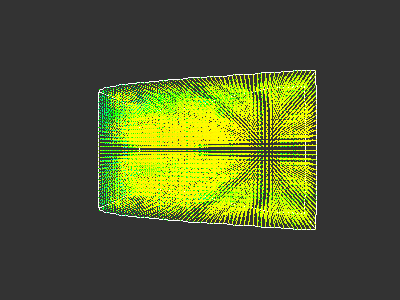

In [2]:
from IPython.display import Image
def vtk_show(renderer, width=400, height=300):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = bytes(memoryview(writer.GetResult()))
    
    return Image(data)

vtk_show(renderer, width=400, height=300)

<img src="imgs/figure.png">

# Challenge 2: Create a pipeline to visualize the sample .vtk files
Create a pipeline to visualize the data files `exercise_op1.vtk` and `exercise_op2.vtk`. Include comments in the code to indicate the different parts of the pipeline.  

In [3]:
import vtk

# create a reader for your unstructured_grid
ugridReader = vtk.vtkUnstructuredGridReader()
ugridReader.SetFileName("data/exercise_op1.vtk")
ugridReader.Update()

ugrid = ugridReader.GetOutput()
scalarRange = ugrid.GetScalarRange()

# mapper
ugridMapper = vtk.vtkDataSetMapper()
ugridMapper.SetInputData(ugrid)
#ugridMapper.SetScalarModeToUseCellData()
#ugridMapper.SetScalarModeToUsePointData()
ugridMapper.SetScalarRange(scalarRange)

# actor
ugridActor = vtk.vtkActor()
ugridActor.SetMapper(ugridMapper)

# create a rendering window and renderer
renderer = vtk.vtkRenderer()
renderer.SetBackground(0.5, 0.5, 0.5)
renderer.AddActor(ugridActor)

renderWindow = vtk.vtkRenderWindow()
renderWindow.SetSize(500, 500)
renderWindow.AddRenderer(renderer)
renderWindow.Render()

# create and enable a renderWindowInteractor
iren = vtk.vtkRenderWindowInteractor()
iren.SetRenderWindow(renderWindow)
iren.Start()